## STEP 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\dell4\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
import prince  # for FAMD
from sklearn.impute import SimpleImputer

## Step 2: Load Data 

In [5]:
df = pd.read_csv("PCOS_Dataset.csv")
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={'pcos (y/n)': 'pcos'}, inplace=True)
df.drop(columns=['sl. no', 'patient file no.'], errors='ignore', inplace=True)
df

,pcos,age (yrs),bmi,blood group,pulse rate(bpm),rr (breaths/min),hb(g/dl),cycle(r/i),cycle length(days),marraige status (yrs),...,pimples(y/n),fast food (y/n),reg.exercise(y/n),bp _systolic (mmhg),bp _diastolic (mmhg),follicle no. (l),follicle no. (r),avg. f size (l) (mm),avg. f size (r) (mm),endometrium (mm)
0,No,28,19.3,O+,78,22,10.48,2,5,7.0,...,No,Yes,No,110,80,3,3,18.0,18.0,8.5
1,No,36,24.9,O+,74,20,11.70,2,5,11.0,...,No,No,No,120,70,3,5,15.0,14.0,3.7
2,Yes,33,25.3,A+,72,18,11.80,2,5,10.0,...,Yes,Yes,No,120,80,13,15,18.0,20.0,10.0
3,No,37,29.7,B+,72,20,12.00,2,5,4.0,...,No,No,No,120,70,2,2,15.0,14.0,7.5
4,No,25,20.1,A+,72,18,10.00,2,5,1.0,...,No,No,No,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,No,35,18.5,AB+,72,16,11.00,2,5,8.0,...,No,No,No,110,70,1,0,17.5,10.0,6.7
537,No,30,25.3,O+,72,18,10.80,2,5,4.0,...,No,No,No,110,70,9,7,19.0,18.0,8.2
538,No,36,23.4,B+,74,20,10.80,2,6,8.0,...,No,No,No,110,80,1,0,18.0,9.0,7.3
539,No,27,22.2,O+,74,20,12.00,4,2,2.0,...,Yes,No,No,110,70,7,6,18.0,16.0,11.5


In [6]:
import random

random.seed(42)
np.random.seed(42)


## Step 3: Data Cleaning & Preprocessing 

In [7]:

df["marraige status (yrs)"] = SimpleImputer(strategy="median").fit_transform(df[["marraige status (yrs)"]])
df["fast food (y/n)"] = SimpleImputer(strategy="most_frequent").fit_transform(df[["fast food (y/n)"]]).ravel()


In [8]:
# Binary encoding
df['pcos'] = df['pcos'].map({'Yes': 1, 'No': 0}) if df['pcos'].dtype == object else df['pcos']
binary_cols = ['weight gain(y/n)', 'hair growth(y/n)', 'skin darkening (y/n)', 
               'hair loss(y/n)', 'pimples(y/n)', 'fast food (y/n)', 
               'reg.exercise(y/n)', 'pregnant(y/n)']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [9]:
# One-hot encoding
cat_cols = df.select_dtypes(include='object').columns.difference(binary_cols + ['pcos'])
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


##  Step 4: PCA + Clustering + Classification 

In [10]:
PCA

X = df.drop(columns=['pcos'])
y = df['pcos']
X_numeric = X.select_dtypes(include=np.number)
X_scaled = StandardScaler().fit_transform(X_numeric)


In [11]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)


C:\Users\dell4\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
# Classification with PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    preds = model.predict(X_test_pca)
    print(f"\n{name} with PCA:\n", classification_report(y_test, preds))



Logistic Regression with PCA:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        77
           1       0.92      0.72      0.81        32

    accuracy                           0.90       109
   macro avg       0.91      0.85      0.87       109
weighted avg       0.90      0.90      0.90       109


Decision Tree with PCA:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        77
           1       0.74      0.62      0.68        32

    accuracy                           0.83       109
   macro avg       0.80      0.77      0.78       109
weighted avg       0.82      0.83      0.82       109


Random Forest with PCA:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        77
           1       0.81      0.69      0.75        32

    accuracy                           0.86       109
   macro avg       0.85      0.81      0.83 

## Step 5: FAMD Transformation 

In [13]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

famd = prince.FAMD(n_components=2, random_state=42)
X_famd = famd.fit_transform(X)



##  Step 6: Classification using FAMD 

In [14]:
X_train_famd, X_test_famd, y_train, y_test = train_test_split(X_famd, y, test_size=0.2, random_state=42)
classifiers = {
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()   # Naive Bayes doesn't use random_state
}
for name, clf in classifiers.items():
    clf.fit(X_train_famd, y_train)
    y_pred = clf.predict(X_test_famd)
    print(f"\n{name} with FAMD:\n", classification_report(y_test, y_pred))



SVM with FAMD:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        77
           1       0.91      0.66      0.76        32

    accuracy                           0.88       109
   macro avg       0.89      0.82      0.84       109
weighted avg       0.88      0.88      0.87       109


Random Forest with FAMD:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93        77
           1       0.92      0.69      0.79        32

    accuracy                           0.89       109
   macro avg       0.90      0.83      0.86       109
weighted avg       0.89      0.89      0.88       109


Naive Bayes with FAMD:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        77
           1       0.91      0.66      0.76        32

    accuracy                           0.88       109
   macro avg       0.89      0.82      0.84       109
weigh

##  Step 7: Subtype Clustering (FAMD + Agglomerative) 

In [15]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
df_subtypes = X.copy()
df_subtypes['Subtype'] = agg_cluster.fit_predict(X_famd)
df_subtypes['Subtype'] = df_subtypes['Subtype'].astype(str)



## Step 8: Subtype Visualization 

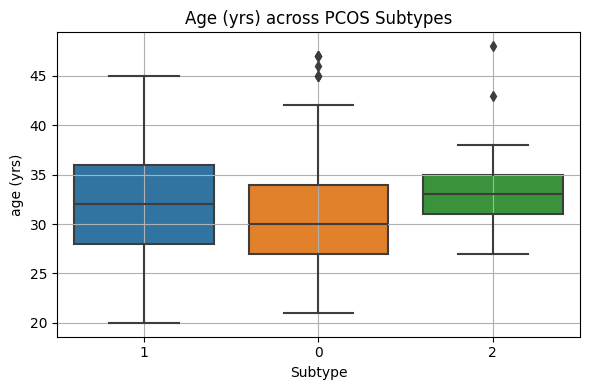

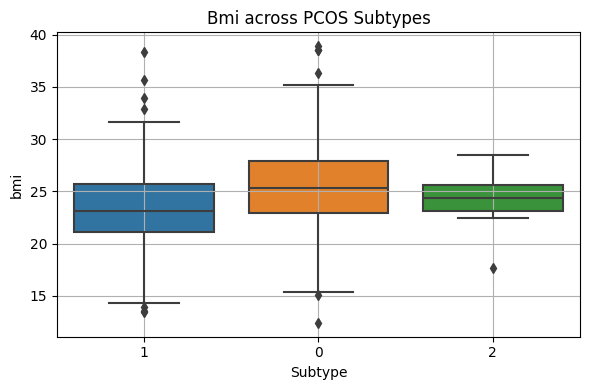

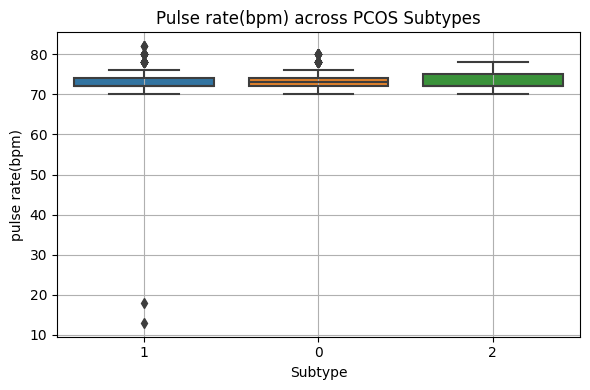

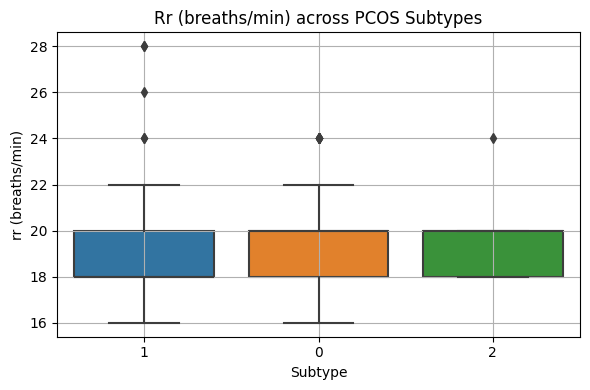

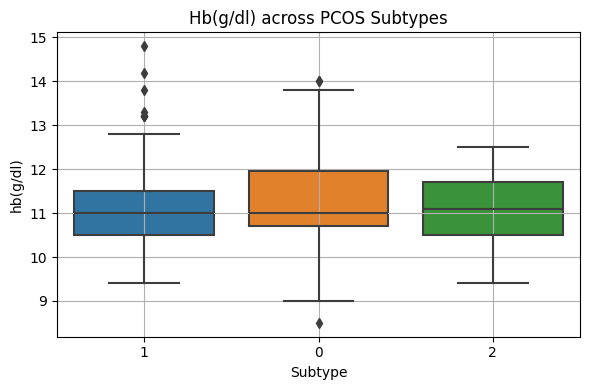

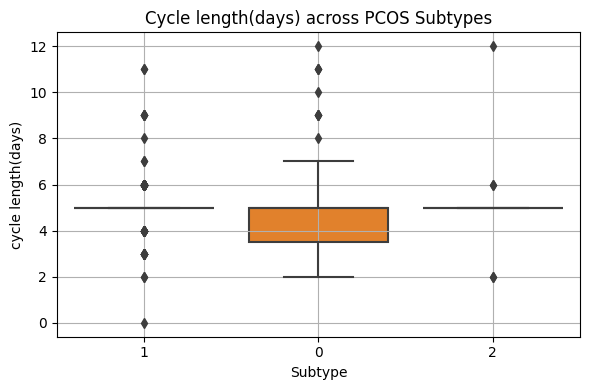

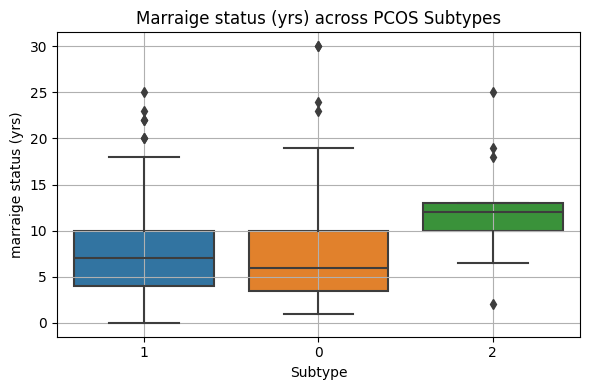

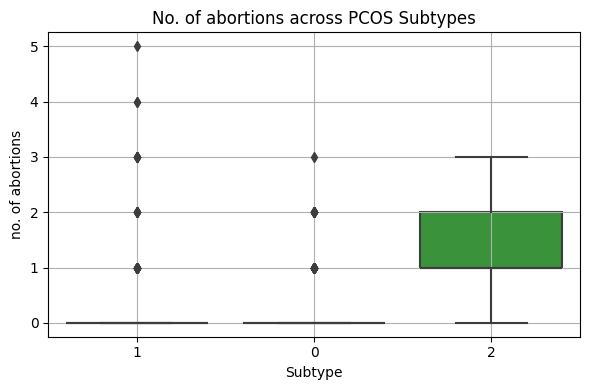

In [16]:
key_features = ['age (yrs)', 'bmi', 'pulse rate(bpm)', 'rr (breaths/min)', 'hb(g/dl)',
                'cycle length(days)', 'marraige status (yrs)', 'no. of abortions']
key_features = [col for col in key_features if col in df_subtypes.columns]

for col in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_subtypes, x='Subtype', y=col)
    plt.title(f"{col.capitalize()} across PCOS Subtypes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Step 9: Subtype Summary Table 

In [17]:
summary = df_subtypes.groupby('Subtype')[key_features].median().T
print("\n Median Values by Subtype:\n")
print(summary)



 Median Values by Subtype:

Subtype                   0     1     2
age (yrs)              30.0  32.0  33.0
bmi                    25.3  23.1  24.4
pulse rate(bpm)        73.0  72.0  72.0
rr (breaths/min)       20.0  18.0  20.0
hb(g/dl)               11.0  11.0  11.1
cycle length(days)      5.0   5.0   5.0
marraige status (yrs)   6.0   7.0  12.0
no. of abortions        0.0   0.0   1.0



# PCOS Subtype Discovery Interpretation

## Median Feature Summary :
| Feature | Subtype 0 | Subtype 1 | Subtype 2 |
|---------|-----------|-----------|-----------|
| Age (yrs) | 30.0 | 32.0 | 33.0 |
| BMI | 25.3 | 23.1 | 24.4 |
| Pulse rate (bpm) | 73 | 72 | 72 |
| Respiratory rate | 20 | 18 | 20 |
| Hemoglobin (g/dl) | 11.0 | 11.0 | 11.1 |
| Cycle length (days) | 5.0 | 5.0 | 5.0 |
| Marriage status (yrs) | 6.0 | 7.0 | 12.0 |
| No. of abortions | 0.0 | 0.0 | 1.0 |

## Cluster Interpretations:
**Subtype 0:**
- Higher BMI and higher pulse rate.
- Younger age group.
- Possibly linked with **metabolic-related PCOS (MetS)**.

**Subtype 1:**
- Slightly lower BMI and respiratory rate.
- Moderate age group.
- Could correspond to **Ovulatory Dysfunction (OD) subtype**.

**Subtype 2:**
- Highest median age.
- Longer marital history and more abortions.
- Intermediate physiological traits.
- Could be associated with **Hormonal or Hyperandrogenic (HA) PCOS**.

 **Conclusion:**
These clustering results suggest biologically and clinically relevant subtypes that align with PCOS classification in literature. Useful for diagnosis, treatment, and clinical insights.
"""



## Step 11: Model Comparison Table 

In [18]:
print("\n Model Accuracy Comparison\n")
all_models = {
    "PCA_Logistic": LogisticRegression(max_iter=1000,random_state=42).fit(X_train_pca, y_train),
    "PCA_Tree": DecisionTreeClassifier(random_state=42).fit(X_train_pca, y_train),
    "PCA_RF": RandomForestClassifier(random_state=42).fit(X_train_pca, y_train),
    "FAMD_SVM": SVC(random_state=42).fit(X_train_famd, y_train),
    "FAMD_RF": RandomForestClassifier(random_state=42).fit(X_train_famd, y_train),
    "FAMD_NB": GaussianNB().fit(X_train_famd, y_train)
}

for name, model in all_models.items():
    if "PCA" in name:
        pred = model.predict(X_test_pca)
    else:
        pred = model.predict(X_test_famd)
    acc = accuracy_score(y_test, pred)
    print(f"{name}: Accuracy = {acc:.2f}")



 Model Accuracy Comparison

PCA_Logistic: Accuracy = 0.90
PCA_Tree: Accuracy = 0.83
PCA_RF: Accuracy = 0.86
FAMD_SVM: Accuracy = 0.88
FAMD_RF: Accuracy = 0.89
FAMD_NB: Accuracy = 0.88


## Model Accuracy Comparison

| Model                    | Accuracy       |
|--------------------------|----------------|
| PCA_Logistic Regression  | 0.90 ✅ Highest |
| FAMD_Random Forest       | 0.89           |
| FAMD_SVM                 | 0.88           |
| FAMD_Naive Bayes         | 0.88           |
| PCA_Random Forest        | 0.86           |
| PCA_Decision Tree        | 0.83 ❗️ Lowest |

---

## Insights

- **PCA + Logistic Regression** achieved the **highest accuracy (0.90)**, showing its strength in capturing linear structure post dimensionality reduction.
- **FAMD + Random Forest** followed closely with **0.89 accuracy**, benefiting from the ability to handle mixed data types.
- **FAMD models** like **SVM** and **Naive Bayes** also performed consistently well (**0.88**), reinforcing FAMD’s usefulness for mixed-type datasets.
- **PCA + Random Forest** showed slightly reduced performance (**0.86**), possibly due to information loss after dimensionality reduction.
- **PCA + Decision Tree** yielded the **lowest accuracy (0.83)**, suggesting it struggles when key feature variance is compressed.

---

##  Conclusion

- **PCA + Logistic Regression** is the top-performing model when the data has strong linear patterns.
- **FAMD + Random Forest** is an excellent alternative, especially for datasets with a mix of categorical and numerical features.
- Model selection should depend on the classifier's compatibility with the structure of transformed data.

